In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Download latest version
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")
file = os.path.join(path, "bodyfat.csv")
df = pd.read_csv(file)

# Print number of features
print(df.shape)

# Print name of features
print(df.columns)

# Clean column names
df.columns = [name.strip() for name in list(df.columns)]

# Print dataset info and check data types
df.info()

(252, 15)
Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


# Data Splitting
- Will be using Weight, Height, Abdomen, and Thigh as dependents and BodyFat for target

In [2]:
# select dependent and target
# sel_feature = ['Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df.drop(columns=['BodyFat'])
y = df['BodyFat'].values

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Print the size of training and testing data
print(X_train.shape, X_test.shape)

(176, 14) (76, 14)


# Train Data
- Data will be scaled first and then transformed into Polynomial and the LinearRegression will take place.
- Using GridSearchCV will give the best poly degree and train the data using that degree.

In [3]:
steps = [('scaler', StandardScaler()),
         ('poly', PolynomialFeatures(degree = 2,
                                     include_bias = False)),
         ('liReg', LinearRegression())]

parameters = {"poly__degree":[2, 3, 4, 5, 6, 7, 8, 9]}
pipeline = Pipeline(steps)

poly_grid = GridSearchCV(pipeline, parameters,
                         cv = 5,
                         scoring = 'neg_mean_squared_error',
                         verbose = True)

poly_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,Pipeline(step...egression())])
,param_grid,"{'poly__degree': [2, 3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


# Check the best parameter

In [4]:
best_parameter = poly_grid.best_params_

# print the param
print ('Best param is: ', best_parameter)

Best param is:  {'poly__degree': 2}


# Perform predictions

In [5]:
# predict Body Fat for the testing data
ytest_pred = poly_grid.predict(X_test)

# predict Body Fat for the training data
ytrain_pred = poly_grid.predict(X_train)

df_train_result = pd.DataFrame({'Actual': y_train, 'Predicted': np.round(ytrain_pred, 1)})
df_test_result = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(ytest_pred, 1)})

# Visualize results
- The scatter plot visualization will be used to understand the relationship between the Predicted and Actual value

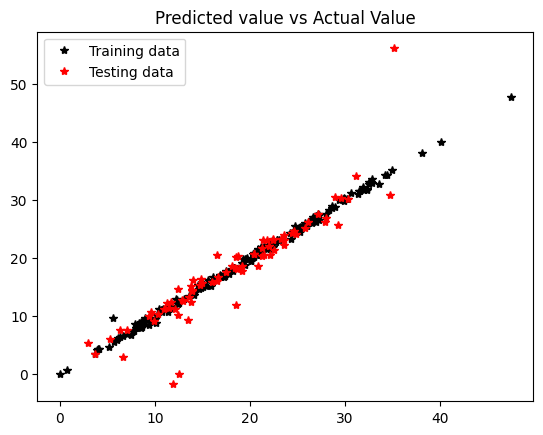

In [6]:
plt.plot(y_train, ytrain_pred, 'k*')
plt.plot(y_test, ytest_pred, 'r*')

plt.title("Predicted value vs Actual Value")
plt.legend(["Training data", "Testing data"])
plt.show()

# Evaluate Results using metrics

In [7]:
# evaluation of training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error of training set: ', np.round(mae, 1))
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error of training set: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score of training set: ', r2)

# evaluation of testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error of testing set: ', np.round(mae, 1))
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error of testing set: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score of testing set: ', r2)

Mean absolute error of training set:  0.3
Mean squared error of training set:  0.24591197228370626
R2 score of training set:  0.9968039225581192
Mean absolute error of testing set:  1.7
Mean squared error of testing set:  12.932081484709851
R2 score of testing set:  0.7501617096756059
